<a href="https://colab.research.google.com/github/pacayton/Forecasting_Codes/blob/main/TS_FA_Ch10_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Code Companion for Forecasting: Principles and Practice, 2nd Edition 

Reference Site for Original Codes: https://otexts.com/fpp2/hierarchical.html

For Chapter 10: Forecasting hierarchical or
grouped time series

Additional Codes by: Dr Peter Julian Cayton,

School of Statistics, University of the Philippines Diliman

https://scholar.google.com/citations?user=KtH_mGEAAAAJ


In [1]:
## Preamble

install.packages("fpp2")
library(fpp2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.4.0     ✔ fma       2.4  
✔ forecast  8.19      ✔ expsmooth 2.3  





10.1 Hierarchical time series

In [3]:
install.packages("hts")
library(hts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘RcppEigen’




Example: Australian tourism hierarchy

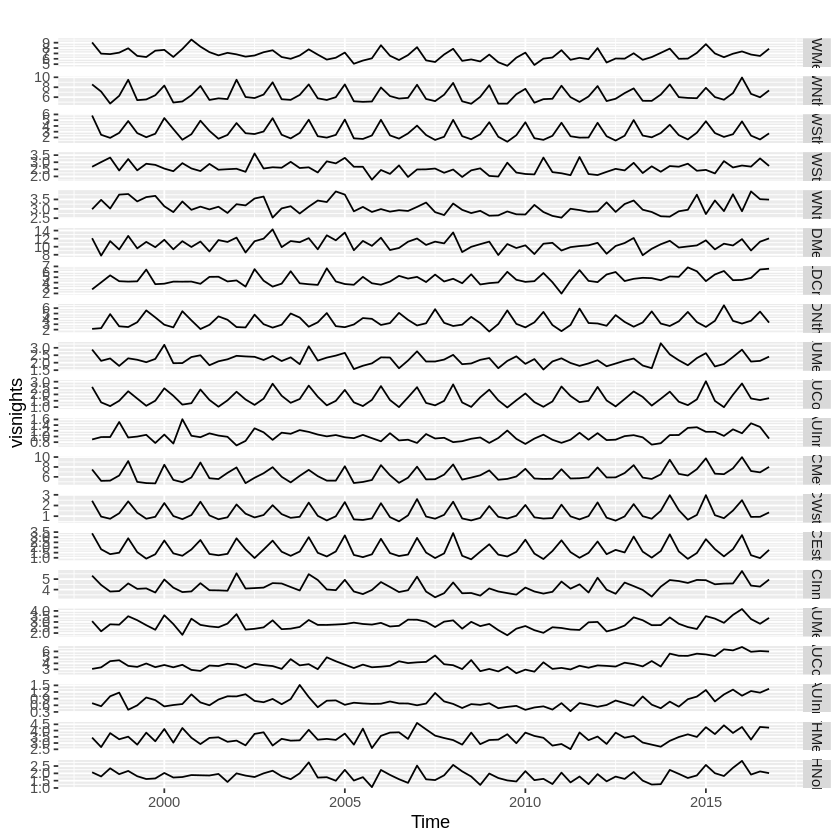

In [4]:
autoplot(visnights, facets = TRUE)

## plot of the bottom time series

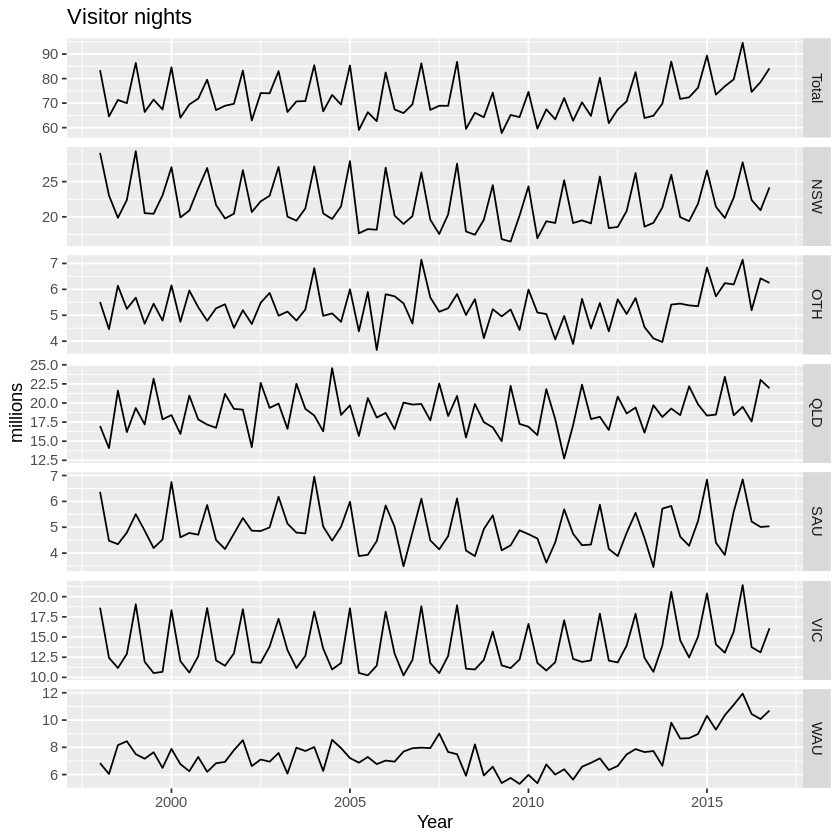

In [5]:
tourism.hts <- hts(visnights, characters = c(3, 5))
## Note the name of the time series will be the basis of the hierarchy structure

tourism.hts %>% aggts(levels=0:1) %>%
autoplot(facet=TRUE) +
xlab("Year") + ylab("millions") + ggtitle("Visitor nights")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



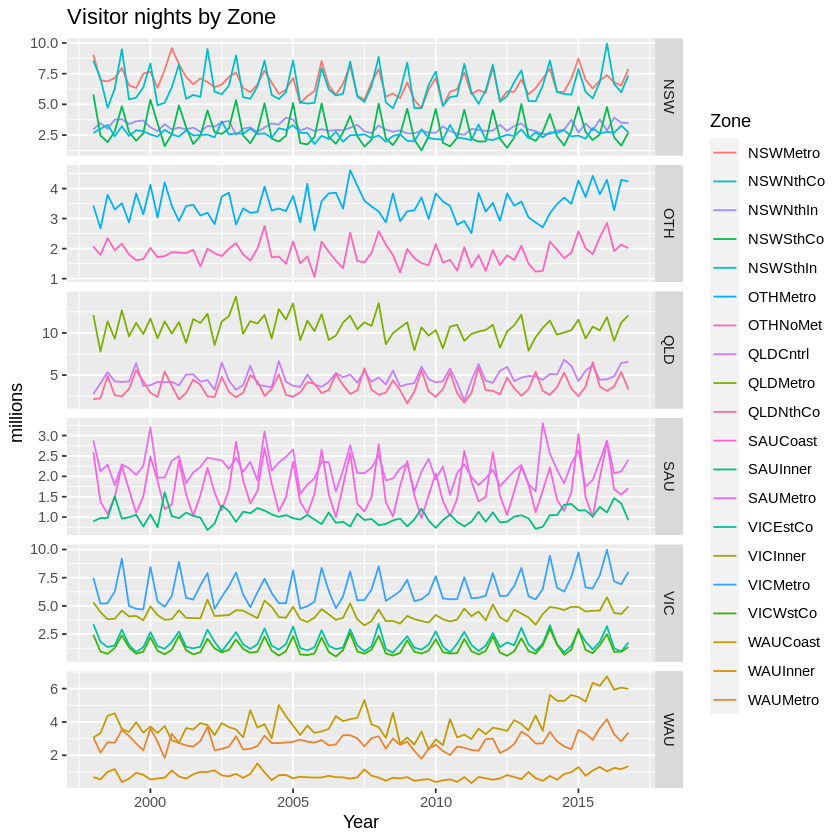

In [6]:
library(tidyverse)

cols <- sample(scales::hue_pal(h=c(15,375),
c=100,l=65,h.start=0,direction = 1)(NCOL(visnights)))

as_tibble(visnights) %>%
gather(Zone) %>%
mutate(Date = rep(time(visnights), NCOL(visnights)),
State = str_sub(Zone,1,3)) %>%
ggplot(aes(x=Date, y=value, group=Zone, colour=Zone)) +
geom_line() +
facet_grid(State~., scales="free_y") +
xlab("Year") + ylab("millions") +
ggtitle("Visitor nights by Zone") +
scale_colour_manual(values = cols)

10.2 Grouped time series

Example: Australian prison population

 Time-Series [1:48, 1:32] from 2005 to 2017: 2 4 1 4 4 6 9 6 4 4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:32] "ACTFRemanded " "ACTFSentenced" "ACTMRemanded " "ACTMSentenced" ...


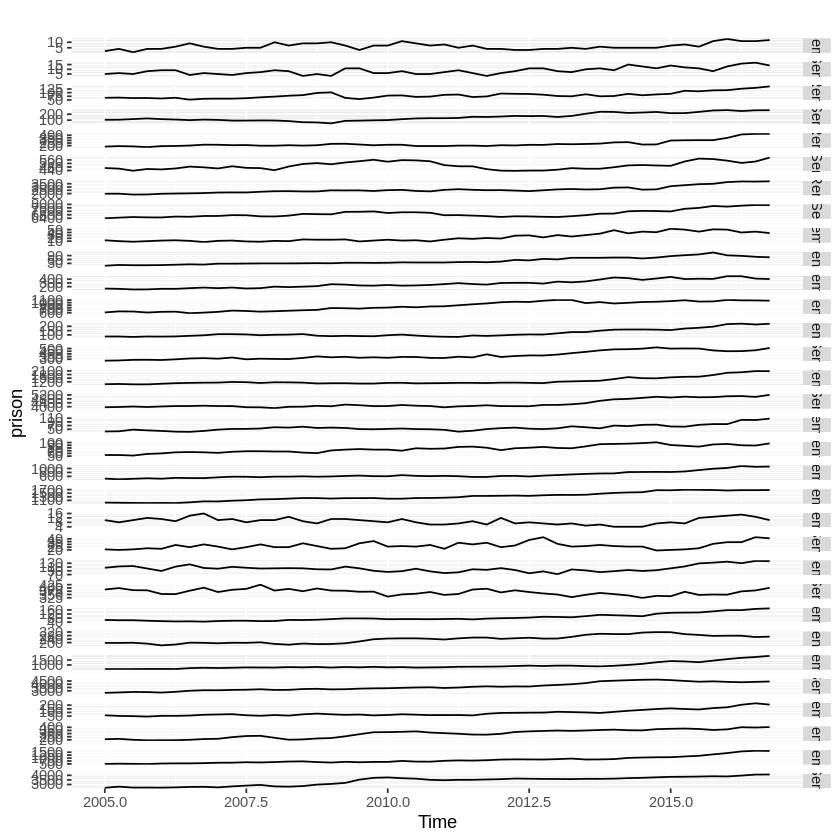

In [9]:
autoplot(prison, facets = TRUE)

str(prison)

In [10]:
prison.gts <- gts(prison/1e3, characters = c(3,1,9),
gnames = c("State", "Gender", "Legal",
"State*Gender", "State*Legal",
"State*Gender*Legal"))

## Namecode is important for understanding the grouping structure
## e.g., "ACTFRemanded " 
## "ACT" = state, in this case, Australian Capital Territory
## "F" = gender, in this case, Females
## "Remanded " = legal state [NOTE THE SPACE!!], in this case, waiting for a sentence
## 3 for state, 1 for gender, 9 for legal status.

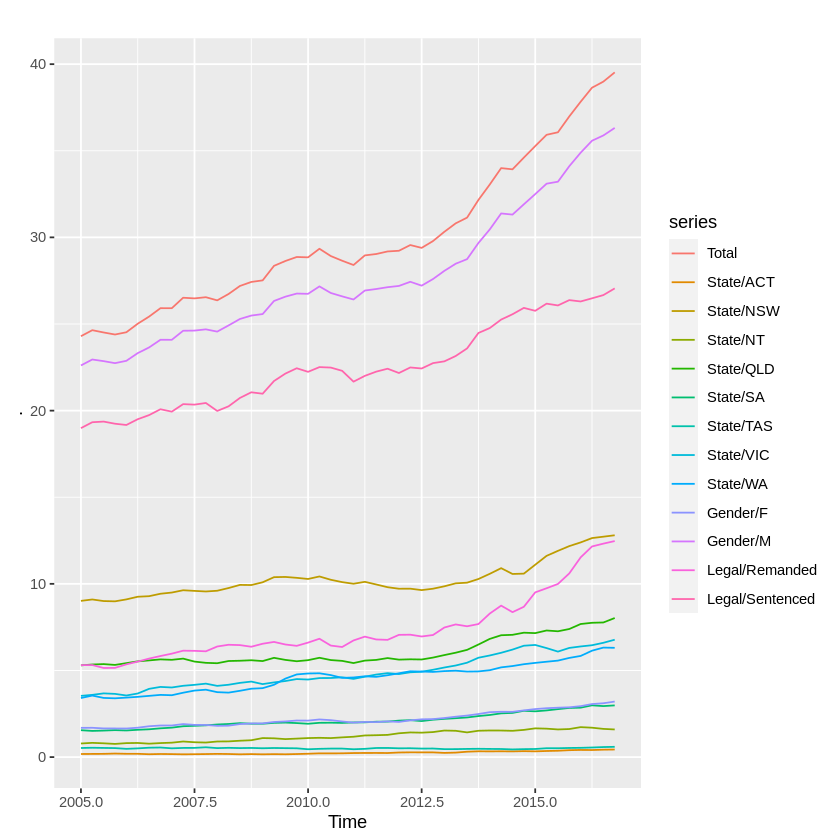

In [15]:
prison.gts %>% aggts(level=0:3) %>% autoplot()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



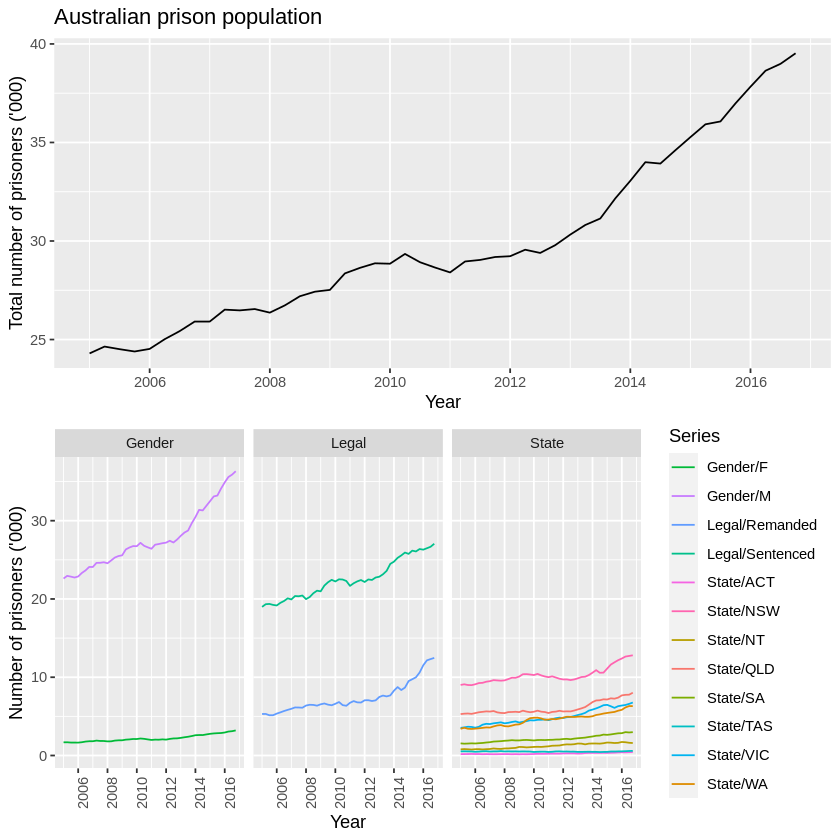

In [16]:
p1 <- prison.gts %>% aggts(level=0) %>%
  autoplot() + ggtitle("Australian prison population") +
  xlab("Year") + ylab("Total number of prisoners ('000)")

groups <- aggts(prison.gts, level=1:3)

cols <- sample(scales::hue_pal(h=c(15,375),
  c=100,l=65,h.start=0,direction = 1)(NCOL(groups)))

p2 <- as_tibble(groups) %>%
  gather(Series) %>%
  mutate(Date = rep(time(groups), NCOL(groups)),
  Group = str_extract(Series, "([A-Za-z ]*)")) %>%
  ggplot(aes(x=Date, y=value, group=Series, colour=Series)) +
  geom_line() +
  xlab("Year") + ylab("Number of prisoners ('000)") +
  scale_colour_manual(values = cols) +
  facet_grid(.~Group, scales="free_y") +
  scale_x_continuous(breaks=seq(2006,2016,by=2)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

install.packages("gridExtra")
gridExtra::grid.arrange(p1, p2, ncol=1)

10.3 The bottom-up approach to forecasting

Steps in Forecasting with Hierarchical / Grouped Time Series

1) Arrange Time Series Namecodes so that they directly show hierarchy/grouping

2) Declare the hierarchy/grouping structure using hts() or gts(), respectively

3) Forecast with the forecast() function.

In [17]:
forecast(prison.gts, method="bu", fmethod="arima")

## fmethod = "ets" for ETS,
## fmethod = "arima" for Automatic ARIMA.

Grouped Time Series 
8 Levels 
Number of groups at each level: 1 8 2 2 16 16 4 32 
Total number of series: 81 
Number of observations in each historical series: 48 
Number of forecasts per series: 8 
Top level series of forecasts: 
         Qtr1     Qtr2     Qtr3     Qtr4
2017 40.06526 40.45023 40.64937 41.02091
2018 41.54746 41.86811 42.10515 42.57171

In [21]:
fcst <- forecast(prison.gts, method="bu", fmethod="arima")

str(fcst)

List of 6
 $ bts    : Time-Series [1:8, 1:32] from 2017 to 2019: 0.01039 0.00924 0.00843 0.00785 0.00744 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:32] "ACTFRemanded " "ACTFSentenced" "ACTMRemanded " "ACTMSentenced" ...
 $ histy  : Time-Series [1:48, 1:32] from 2005 to 2017: 0.002 0.004 0.001 0.004 0.004 0.006 0.009 0.006 0.004 0.004 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:32] "ACTFRemanded " "ACTFSentenced" "ACTMRemanded " "ACTMSentenced" ...
 $ labels :List of 6
  ..$ State             : chr [1:8] "State/ACT" "State/NSW" "State/NT " "State/QLD" ...
  ..$ Gender            : chr [1:2] "Gender/F" "Gender/M"
  ..$ Legal             : chr [1:2] "Legal/Remanded " "Legal/Sentenced"
  ..$ State*Gender      : chr [1:16] "State*Gender/ACTF" "State*Gender/ACTM" "State*Gender/NSWF" "State*Gender/NSWM" ...
  ..$ State*Legal       : chr [1:16] "State*Legal/ACTRemanded " "State*Legal/ACTSentenced" "State*Legal/NSWRemanded " "State*Le

10.4 Top-down approaches

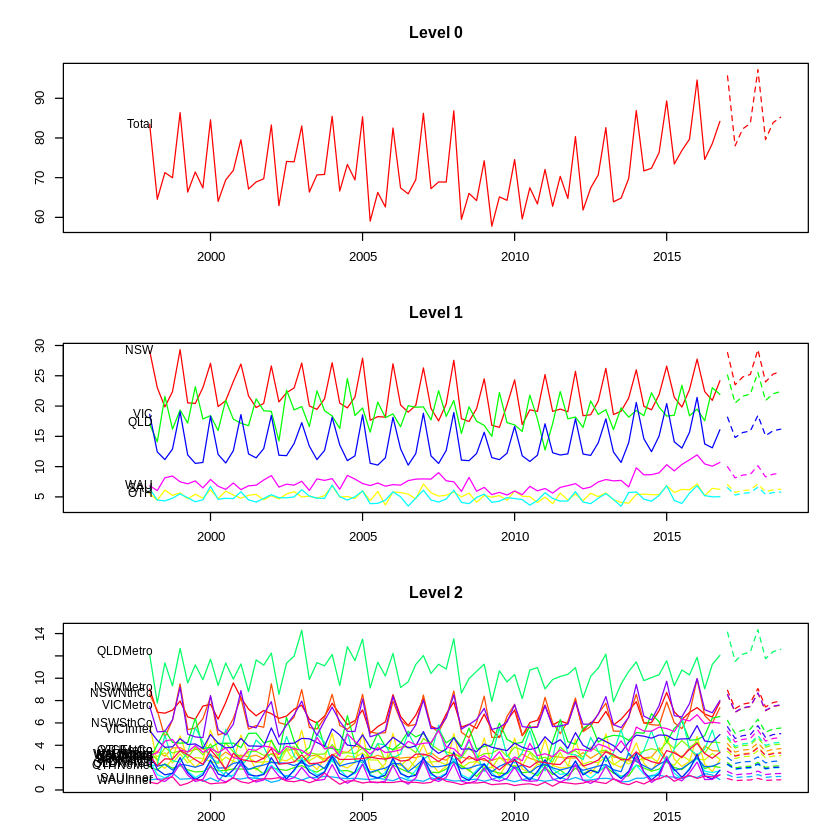

In [23]:
fcst <- forecast(tourism.hts, method="tdgsa", fmethod="arima")

plot(fcst)

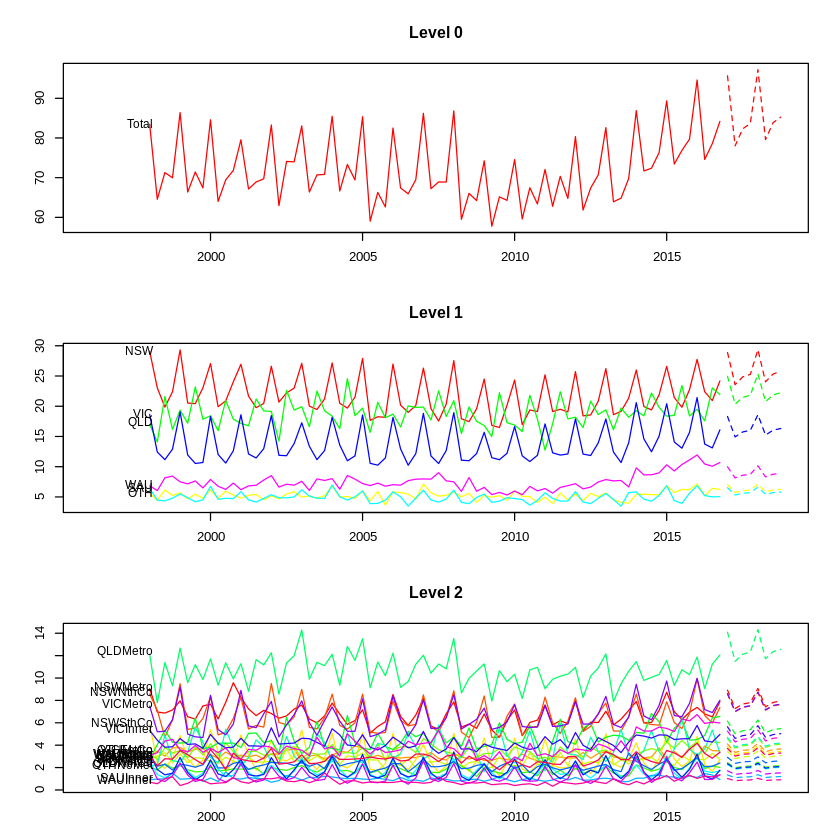

In [24]:
fcst <- forecast(tourism.hts, method="tdgsf", fmethod="arima")

plot(fcst)

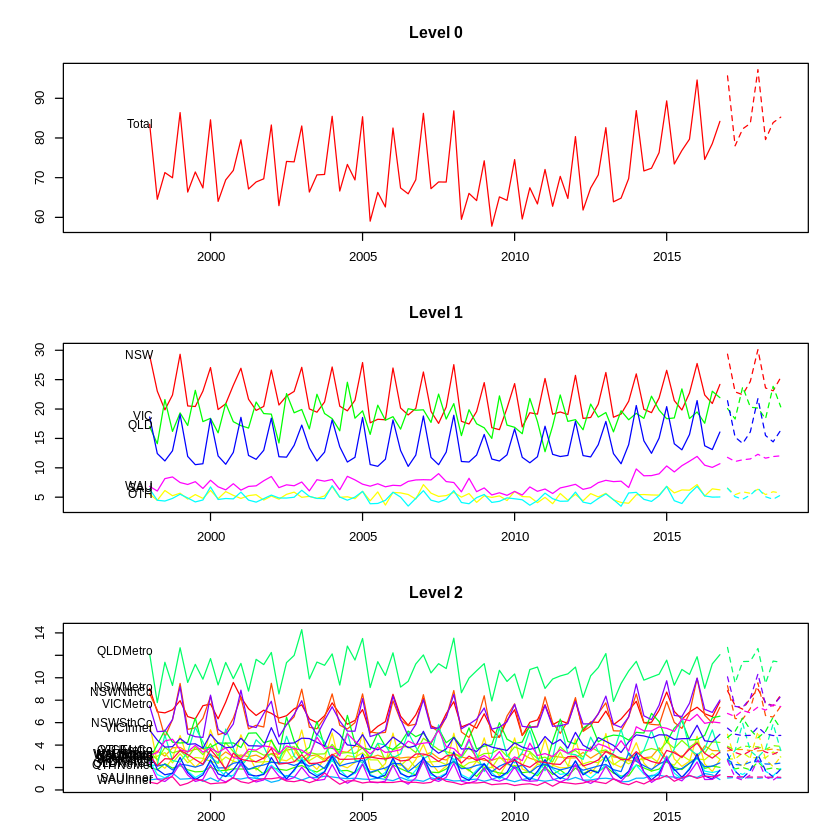

In [25]:
fcst <- forecast(tourism.hts, method="tdfp", fmethod="arima")

plot(fcst)

10.5 Middle-out approach

Hierarchical Time Series 
3 Levels 
Number of nodes at each level: 1 6 20 
Total number of series: 27 
Number of observations in each historical series: 76 
Number of forecasts per series: 8 
Top level series of forecasts: 
         Qtr1     Qtr2     Qtr3     Qtr4
2017 93.32627 75.70450 79.51271 81.15298
2018 93.90874 76.57744 80.37253 82.02744

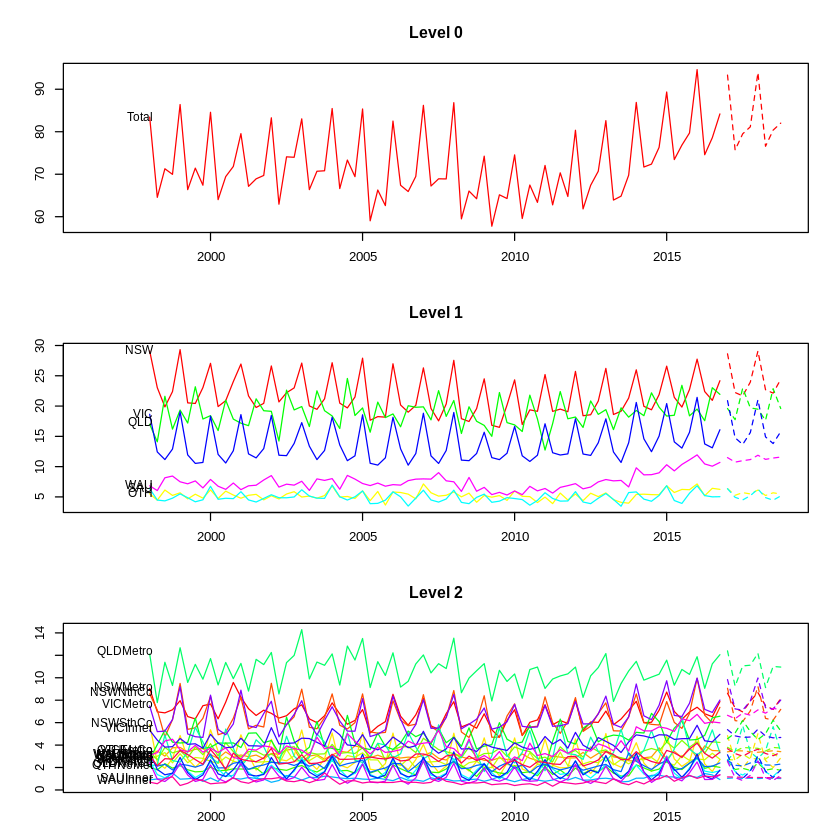

In [27]:
(fcst <- forecast(tourism.hts, method="mo", level = 1, fmethod="arima"))

plot(fcst)

10.7 The optimal reconciliation approach

In [28]:
prisonfc <- forecast(prison.gts)

## default: method = "comb", weights = "wls"

In [29]:
fcsts <- aggts(prisonfc, levels=0:3)

In [30]:
groups <- aggts(prison.gts, levels=0:3)

For a multivariate time series, specify a seriesname for each time series. Defaulting to column names.



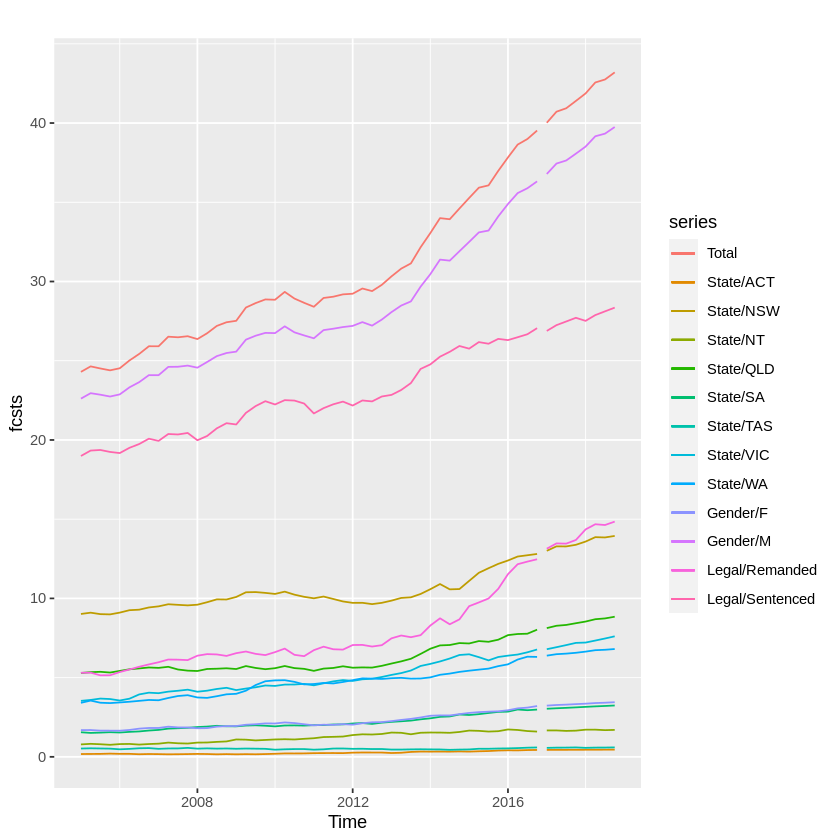

In [31]:
autoplot(fcsts) + autolayer(groups)

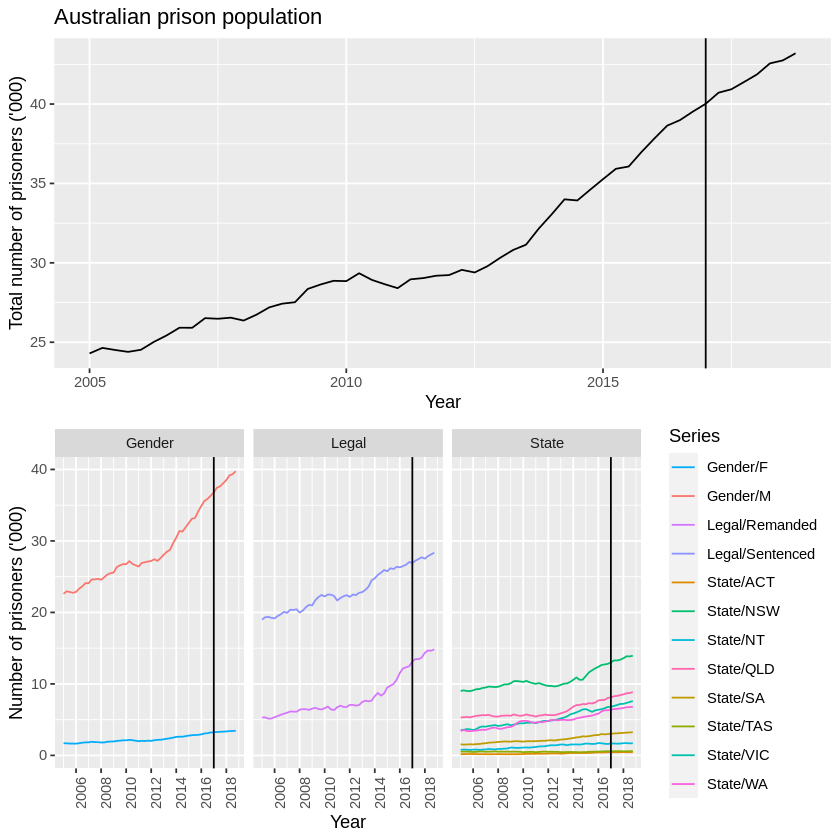

In [32]:
prisonfc <- ts(rbind(groups, fcsts), start=start(groups), frequency=4)

p1 <- autoplot(prisonfc[,"Total"]) +
  ggtitle("Australian prison population") +
  xlab("Year") + ylab("Total number of prisoners ('000)") +
  geom_vline(xintercept=2017)

cols <- sample(scales::hue_pal(h=c(15,375), c=100,l=65,h.start=0,direction = 1)(NCOL(groups)))

p2 <- as_tibble(prisonfc[,-1]) %>%
  gather(Series) %>%
  mutate(Date = rep(time(prisonfc), NCOL(prisonfc)-1),
    Group = str_extract(Series, "([A-Za-z ]*)")) %>%
  ggplot(aes(x=Date, y=value, group=Series, colour=Series)) +
  geom_line() +
  xlab("Year") + ylab("Number of prisoners ('000)") +
  scale_colour_manual(values = cols) +
  facet_grid(. ~ Group, scales="free_y") +
  scale_x_continuous(breaks=seq(2006,2018,by=2)) +
  theme(axis.text.x = element_text(angle=90, hjust=1)) +
  geom_vline(xintercept=2017)

gridExtra::grid.arrange(p1, p2, ncol=1)